<a href="https://colab.research.google.com/github/EasyLion05/Linear-Regression-Health-Costs-Calculator/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install -q git+https://github.com/tensorflow/docs
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [22]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

dataset = pd.read_csv('insurance.csv')
dataset.head()

--2022-10-27 15:34:11--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-10-27 15:34:11 (55.6 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [23]:

len(dataset)

1338

In [24]:
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [25]:
#Since the data has some text columns, we need to convert the text values to numeric.
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [26]:
#Let's pick randomly 20% record to make our test_dataset first
test_dataset = dataset.sample(frac=0.3)
len(test_dataset)

401

In [27]:
#Now, we select the remaining 80% to make train_dataset
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

937

In [28]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
5,31.0,0.0,25.7,0.0,1.0,1.0,3756.62
6,46.0,0.0,33.4,1.0,1.0,1.0,8240.59
8,37.0,1.0,29.8,2.0,1.0,3.0,6406.41


In [29]:
#Preparing labels
train_labels = train_dataset.pop("expenses")
train_labels.head()

1     1725.55
3    21984.47
5     3756.62
6     8240.59
8     6406.41
Name: expenses, dtype: float64

In [30]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
1,18.0,1.0,33.8,1.0,1.0,1.0
3,33.0,1.0,22.7,0.0,1.0,2.0
5,31.0,0.0,25.7,0.0,1.0,1.0
6,46.0,0.0,33.4,1.0,1.0,1.0
8,37.0,1.0,29.8,2.0,1.0,3.0


In [31]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

1169     6112.35
72      11741.73
644     18806.15
329      9144.57
940      1121.87
Name: expenses, dtype: float64

In [32]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
1169,37,0,34.1,1,1,2
72,53,0,28.1,3,1,0
644,43,1,35.3,2,1,1
329,52,1,36.7,0,1,0
940,18,1,23.2,0,1,1


In [33]:
#Model
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])


In [34]:
#Compiling
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 16)                112       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198
Trainable params: 185
Non-trainable params: 13
_______________________________________________________

In [35]:
#Feeding the model
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

13/13 - 0s - loss: 3452.6680 - mae: 3452.6680 - mse: 38944552.0000 - 35ms/epoch - 3ms/step
Testing set Mean Abs Error: 3452.67 expenses
You passed the challenge. Great job!
13/13 [==============================] - 0s 2ms/step


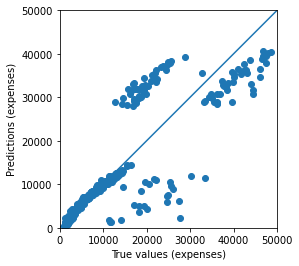

In [36]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
